In [0]:
## Import training_images.npz, testing_images.npz and examples.npz into the file
!wget "http://users.sussex.ac.uk/~is321/training_images.npz" -O training_images.npz
!wget "http://users.sussex.ac.uk/~is321/test_images.npz" -O test_images.npz
!wget "http://users.sussex.ac.uk/~is321/examples.npz" -O examples.npz

--2020-05-27 23:52:23--  http://users.sussex.ac.uk/~is321/training_images.npz
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375302693 (358M)
Saving to: ‘training_images.npz’

training_images.npz 100%[===================>] 357.92M  8.87MB/s    in 44s     

2020-05-27 23:53:09 (8.21 MB/s) - ‘training_images.npz’ saved [375302693/375302693]

--2020-05-27 23:53:11--  http://users.sussex.ac.uk/~is321/test_images.npz
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74915629 (71M)
Saving to: ‘test_images.npz’

test_images.npz     100%[===================>]  71.44M  9.06MB/s    in 12s     

2020-05-27 23:53:23 (5.95 MB/s) - ‘test_images.npz’ saved [74915629/74915629]

--2020

In [1]:
import numpy as np
from skimage.color import rgb2gray,gray2rgb

# Load the data using np.load
data = np.load('training_images.npz',allow_pickle=True)

# Extract the images
trainImages1 = data['images']

# Change image to grayscale
trainImages = rgb2gray(trainImages1)

# Extract the data points
pts = data['points']



In [2]:
for i in range(2811):
    for j in range(32):
        for k in range(2):
            if(pts[i][j][k] > 242):
                pts[i][j][k] = 242
            # Change any coordinates below limit to 0
            if(pts[i][j][k] < 0):
                pts[i][j][k] = 0
            # Change all coordinate values to be between -1 and 1
            pts[i][j][k] = pts[i][j][k] - 121
            pts[i][j][k] = pts[i][j][k] / 121

# Set data type to float32
trainImages = trainImages.astype(np.float32)        
pts = pts.astype(np.float32)

# Reshape size
trainImages = trainImages.reshape(2811,58564)
pts = pts.reshape(2811, 64)

In [72]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from ipykernel import kernelapp as app

# Using Sequential to define new model 
model = Sequential([
    # Added input layer, this layer is a Dense layer from Keras Layers
    Dense(500, input_dim=trainImages.shape[1]),
    # Added an activation layer from Keras Layers
    Activation('relu'),
    # Added another Dense Layer as the output layer, this time with output shape 64(32*2)
    Dense(64),
])

# Set sgd for optimzer
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
# Using a mean squared error for loss and set sgd for optimizer 
model.compile(loss='mean_squared_error', optimizer=sgd)
# model.compile(loss='binary_crossentropy', optimizer=sgd)


In [73]:
model.fit(trainImages, pts, nb_epoch=50, validation_split=0.2,verbose=1)

C:\Users\user\AppData\Local\conda\conda\envs\tf1.4py3.6\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2248 samples, validate on 563 samples
Epoch 1/50
2248/2248 [==============================] - 2s - loss: 0.0484 - val_loss: 0.0252
Epoch 2/50
2248/2248 [==============================] - 1s - loss: 0.0223 - val_loss: 0.0213
Epoch 3/50
2248/2248 [==============================] - 1s - loss: 0.0196 - val_loss: 0.0197
Epoch 4/50
2248/2248 [==============================] - 1s - loss: 0.0181 - val_loss: 0.0184
Epoch 5/50
2248/2248 [==============================] - 1s - loss: 0.0171 - val_loss: 0.0176
Epoch 6/50
2248/2248 [==============================] - 1s - loss: 0.0164 - val_loss: 0.0170
Epoch 7/50
2248/2248 [==============================] - 1s - loss: 0.0159 - val_loss: 0.0167
Epoch 8/50
2248/2248 [==============================] - 1s - loss: 0.0154 - val_loss: 0.0163
Epoch 9/50
2248/2248 [==============================] - 1s - loss: 0.0150 - val_loss: 0.0161
Epoch 10/50
2248/2248 [==============================] - 1s - loss: 0.0147 - val_loss: 0.0157
Epoch 11/50
2248/2248 

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 500)               29282500  
_________________________________________________________________
activation_11 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                32064     
Total params: 29,314,564
Trainable params: 29,314,564
Non-trainable params: 0
_________________________________________________________________


# Visualization of test set prediction results

In [75]:
# Import testing data from file
test = np.load('test_images.npz',allow_pickle=True)

# Store testing images in a variable
testImages1 = test['images']

# Set images to grayscale
testImages = rgb2gray(testImages1)

# Set images to datatype float32
testImages = testImages.astype(np.float32)

# Reshape images
testImages = testImages.reshape(554,58564)

In [76]:
predictedPts = model.predict(testImages)

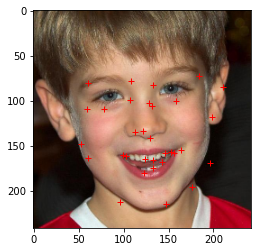

In [78]:
def visualise_pts(img, pts):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.plot(121*pts[0::2]+ 121, 121*pts[1::2]+ 121, '+r')
#     plt.savefig('model1_m_0.001.png')
    plt.show()

for i in range(1):
  idx = np.random.randint(0, 3)
  visualise_pts(testImages1[i],predictedPts[i])

# Calculating Prediction Error and exporting results

In [70]:
## Function to calculate euclidean distance between predicted and real points
def euclid_dist(pred_pts, gt_pts):
  """
  Calculate the euclidean distance between pairs of points
  :param pred_pts: The predicted points
  :param gt_pts: The ground truth points
  :return: An array of shape (no_points,) containing the distance of each predicted point from the ground truth
  """
  import numpy as np
  pred_pts = np.reshape(pred_pts, (-1, 2))
  gt_pts = np.reshape(gt_pts, (-1, 2))
  return np.sqrt(np.sum(np.square(pred_pts - gt_pts), axis=-1))

In [1]:
# Use model to predict points on training images
predictedPoints = model.predict(trainImages)

# Copy real points into new variable
basePoints = pts.copy()

predictedPoints = predictedPoints * 121
predictedPoints = predictedPoints + 121
basePoints = basePoints * 121
basePoints = basePoints + 121

# Calculate the mean of all distances
np.mean(euclid_dist(predictedPoints,basePoints))

9.830919

# Visualization of example set prediction results

In [31]:
## Pre-processing of example images
# Load data from file
example = np.load('examples.npz',allow_pickle=True)

# Extract images from data
exampleImages1 = example['images']

# Change images to grayscale
exampleImages = rgb2gray(exampleImages1)

# Reshape image for use in model
exampleImages = exampleImages.reshape(-1,58564)

# Use model to predict points on example images
predictedPts2 = model.predict(exampleImages)

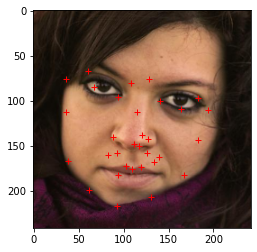

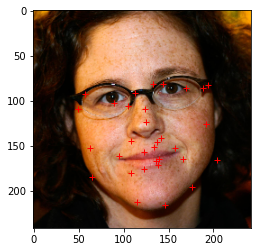

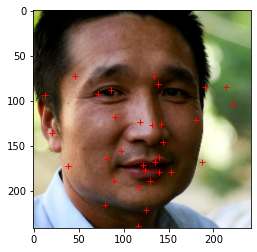

In [32]:
for i in range(3):
  idx = np.random.randint(0, 3)
  visualise_pts(exampleImages1[i],predictedPts2[i])

In [33]:
def save_as_csv(points, location = '.'):
    """
    Save the points out as a .csv file
    :param points: numpy array of shape (no_test_images, no_points, 2) to be saved
    :param location: Directory to save results.csv in. Default to current working directory
    """
    assert points.shape[0]==554, 'wrong number of image points, should be 554 test images'
    assert np.prod(points.shape[1:])==32*2, 'wrong number of points provided. There should be 32 points with 2 values (x,y) per point'
    np.savetxt(location + '/results1_m_0.01.csv', np.reshape(points, (points.shape[0], -1)), delimiter=',')


In [34]:
for i in range(554):
    for j in range(64):
        predictedPts[i][j]=121*predictedPts[i][j]+121
# save_as_csv(predictedPts)